<a href="https://colab.research.google.com/github/Mahmoudkhaled17/DEPI-2024/blob/machine-learning/heartbeat_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1).json


In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d shayanfazeli/heartbeat

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 93% 92.0M/98.8M [00:01<00:00, 95.2MB/s]
100% 98.8M/98.8M [00:01<00:00, 79.6MB/s]


In [2]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [27]:
import pandas as pd
df=pd.read_csv('/content/mitbih_train.csv',header=None)

In [28]:
y_data=df.iloc[:,-1]
x_data=df.iloc[:,:-1]

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=.9)
x_data=pca.fit_transform(x_data)

In [30]:
x_data=pd.DataFrame(x_data)
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.300214,-0.003410,0.606018,0.745096,-0.226768,-0.145488,0.692298,-0.349425,0.349320,-0.341987,...,-0.058369,0.504450,-0.060749,-0.019990,0.089619,0.299252,-0.315253,0.079743,0.029670,0.195391
1,-1.436884,0.604471,-0.569402,-0.413966,-0.194302,-0.380073,0.079079,-0.016559,-0.157483,-0.499933,...,0.219057,-0.061642,0.604218,0.041492,0.363438,0.214009,-0.222517,0.060002,0.026126,-0.100160
2,-1.720580,-0.075125,-0.245855,0.075545,-0.677761,-0.350730,0.207186,-0.363509,0.383327,-0.029950,...,0.075098,0.366392,0.019420,0.037238,0.273832,0.062745,-0.409188,-0.120041,0.151677,0.078059
3,-1.509363,-0.044757,0.349790,0.618420,-0.234009,-0.616890,0.102943,-0.205053,0.893421,0.133068,...,0.412056,0.106100,0.090740,0.031625,0.196126,-0.131584,-0.157876,-0.404299,-0.038420,-0.055734
4,-1.181010,1.019874,-0.778794,-0.607392,-0.055837,-0.127393,0.542517,-0.036565,0.053350,-0.575636,...,0.356765,0.402105,0.554183,0.182310,0.271923,0.380898,-0.031526,0.018443,-0.112089,-0.007145


In [31]:
y_data.value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


<BarContainer object of 5 artists>

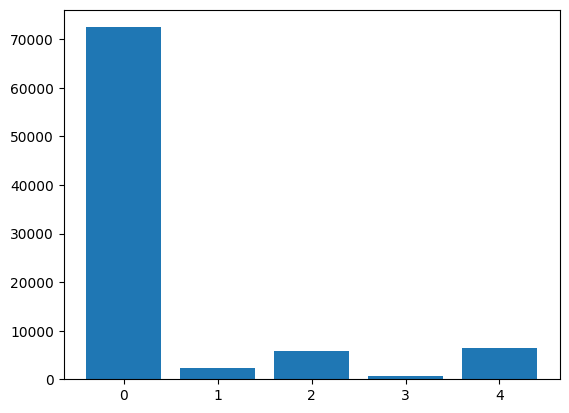

In [32]:
import matplotlib.pyplot as plt
plt.bar(y_data.value_counts().index,y_data.value_counts())

In [33]:
from imblearn.over_sampling import SMOTE


In [34]:
smo=SMOTE(random_state=42)

In [35]:
x_data,y_data=smo.fit_resample(x_data,y_data)

In [36]:
y_data.value_counts()

,count
187,
0.0,72471
1.0,72471
2.0,72471
3.0,72471
4.0,72471


In [37]:
x_data.shape[1]

23

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
train_x,test_x,train_y,test_y=train_test_split(x_data,y_data,test_size=0.2)


In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [41]:
model1=Sequential()
model1.add(Dense(32,activation='relu',input_shape=(x_data.shape[1],)))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(5,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[tf.metrics.F1Score,"accuracy"])

In [43]:
train_x.shape

(289884, 23)

In [44]:
train_y.shape

(289884,)

In [45]:
model1.fit(train_x,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7955 - f1_score: 0.3626 - loss: 0.5520 - val_accuracy: 0.9072 - val_f1_score: 0.3630 - val_loss: 0.2621
Epoch 2/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9146 - f1_score: 0.3635 - loss: 0.2422 - val_accuracy: 0.9161 - val_f1_score: 0.3644 - val_loss: 0.2300
Epoch 3/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9288 - f1_score: 0.3634 - loss: 0.2030 - val_accuracy: 0.9320 - val_f1_score: 0.3630 - val_loss: 0.1966
Epoch 4/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9361 - f1_score: 0.3635 - loss: 0.1828 - val_accuracy: 0.9403 - val_f1_score: 0.3631 - val_loss: 0.1714
Epoch 5/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9422 - f1_score: 0.3635 - loss: 0.1675 - val_accuracy: 0.9478 - val_f1_score: 0.3634 - val_loss: 0.1571
Epoch 6/10
7248/7248 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9476 - f1_score: 0.3635 - loss: 0.1542 - val_accuracy: 0.9473 - va

In [46]:
from sklearn.metrics import classification_report,f1_score

In [47]:
model1.evaluate(test_x,test_y)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - f1_score: 0.3634 - loss: 0.1400


[0.13777707517147064,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.02460635, 0.17900865, 0.35127857, 0.54511213, 0.71704185],
       dtype=float32)>,
 0.9556926488876343]

In [48]:
pred=model1.predict(test_x)

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [49]:
print(classification_report(test_y,pred.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91     14516
         1.0       0.94      0.96      0.95     14528
         2.0       0.97      0.95      0.96     14520
         3.0       0.95      0.99      0.97     14419
         4.0       0.99      0.98      0.99     14488

    accuracy                           0.96     72471
   macro avg       0.96      0.96      0.96     72471
weighted avg       0.96      0.96      0.96     72471

